# Team Minneapolis Machine Learning Model for Covid-19
In our model we predict the number of Covid-10 Cases in the Midwestern United States through the end of 2020.


In [ ]:
# Import all dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
#Load dataset from csv
usa = pd.read_csv('enigma_Aug_8_2020.csv')
usa.head()

,state_fips,state_name,lat,long,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
0,36,New York,42.913397,-75.596272,7/1/2020,398770,31791,394079.0,3577569.0,NaN,3971648.0,226.0,879.0,139.0,70590.0
1,36,New York,42.913397,-75.596272,7/2/2020,399642,31814,394954.0,3646639.0,NaN,4041593.0,209.0,878.0,129.0,70698.0
2,36,New York,42.913397,-75.596272,7/3/2020,400561,31836,395872.0,3712113.0,NaN,4107985.0,188.0,857.0,125.0,70794.0
3,36,New York,42.913397,-75.596272,7/4/2020,401286,31860,396598.0,3773790.0,NaN,4170388.0,190.0,844.0,119.0,70877.0
4,36,New York,42.913397,-75.596272,7/5/2020,401822,31895,397131.0,3836672.0,NaN,4233803.0,178.0,832.0,116.0,70968.0


In [ ]:
# #Load dataset from s3 Bucket

# import boto3
# import io
# from sagemaker import get_execution_role
# import os

# # Amazon SageMaker Python SDK
# import sagemaker.amazon.common as smac 
# import sagemaker

# role = get_execution_role()
# input_bucket = ''
# in_data_key = ''
# training_data_location = 's3://{}/{}'.format(input_bucket, in_data_key)

# # Define the headers since the data does not have any
# #headers = ['date','county','state','fips','cases','deaths']

# #df = pd.read_csv(training_data_location, names=headers)
# usa = pd.read_csv(training_data_location)
# print('uploaded training data from location: {}'.format(training_data_location))

In [3]:
# Remove not needed columns
usa = usa.drop(columns = ['state_fips', 'lat', 'long'])
usa.head()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
0,New York,7/1/2020,398770,31791,394079.0,3577569.0,NaN,3971648.0,226.0,879.0,139.0,70590.0
1,New York,7/2/2020,399642,31814,394954.0,3646639.0,NaN,4041593.0,209.0,878.0,129.0,70698.0
2,New York,7/3/2020,400561,31836,395872.0,3712113.0,NaN,4107985.0,188.0,857.0,125.0,70794.0
3,New York,7/4/2020,401286,31860,396598.0,3773790.0,NaN,4170388.0,190.0,844.0,119.0,70877.0
4,New York,7/5/2020,401822,31895,397131.0,3836672.0,NaN,4233803.0,178.0,832.0,116.0,70968.0


In [4]:
# Convert dates to datetime
usa['datetime'] = pd.to_datetime(usa['date'])
usa.tail()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime
8149,New York,6/26/2020,395972,31075,391220.0,3290097.0,NaN,3681317.0,244.0,951.0,167.0,70010.0,2020-06-26
8150,New York,6/27/2020,396669,31105,391923.0,3362656.0,NaN,3754579.0,230.0,908.0,167.0,70010.0,2020-06-27
8151,New York,6/28/2020,397293,31137,392539.0,3423946.0,NaN,3816485.0,229.0,869.0,167.0,70010.0,2020-06-28
8152,New York,6/29/2020,397684,31143,392930.0,3469983.0,NaN,3862913.0,216.0,853.0,136.0,70435.0,2020-06-29
8153,New York,6/30/2020,398142,31776,393454.0,3521484.0,NaN,3914938.0,217.0,891.0,137.0,70487.0,2020-06-30


# Segment out the West North Central Divsion of the Midwest Region
Iowa, Kansas, Minnesota, Missouri, North Dakota and South Dakota

In [5]:
# Create DF for just West North Central
west_northern_central =  usa[(usa['state_name']=='Iowa') | (usa['state_name'] == 'Kansas') |
                      (usa['state_name'] == 'Minnesota') | (usa['state_name'] == 'Missouri') | 
                     (usa['state_name']=='North Dakota') | (usa['state_name']=='South Dakota')] 

west_northern_central.head()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime
176,North Dakota,3/11/2020,1,0,0.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,2020-03-11
177,North Dakota,3/12/2020,1,0,1.0,12.0,14.0,13.0,NaN,NaN,NaN,NaN,2020-03-12
178,North Dakota,3/13/2020,1,0,1.0,39.0,12.0,40.0,NaN,NaN,NaN,NaN,2020-03-13
179,North Dakota,3/14/2020,1,0,1.0,54.0,14.0,55.0,NaN,NaN,NaN,NaN,2020-03-14
180,North Dakota,3/15/2020,1,0,1.0,95.0,4.0,96.0,NaN,NaN,NaN,NaN,2020-03-15


In [7]:
# Summing case count for Western Northern Central by date
# Groupby to consolidate cases by entire region
wnc_group = west_northern_central.groupby(["datetime"]).sum()
wnc_group.tail()

,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
datetime,,,,,,,,,,
2020-07-24,171407,4208,169034.0,2332495.0,0.0,2501529.0,278.0,1647.0,210.0,84981.0
2020-07-25,174036,4219,171821.0,2362999.0,0.0,2534820.0,285.0,1964.0,211.0,86157.0
2020-07-26,176951,4235,174660.0,2391636.0,0.0,2566296.0,290.0,1961.0,212.0,87249.0
2020-07-27,180225,4261,178009.0,2423595.0,0.0,2601604.0,262.0,1857.0,215.0,88412.0
2020-07-28,182605,4293,177964.0,2448856.0,0.0,2626820.0,271.0,1640.0,167.0,90149.0


In [8]:
# Sort by datetime and reset index
wnc_group.sort_values(by = 'datetime')
wnc_group = wnc_group.reset_index()
wnc_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
140,2020-07-24,171407,4208,169034.0,2332495.0,0.0,2501529.0,278.0,1647.0,210.0,84981.0
141,2020-07-25,174036,4219,171821.0,2362999.0,0.0,2534820.0,285.0,1964.0,211.0,86157.0
142,2020-07-26,176951,4235,174660.0,2391636.0,0.0,2566296.0,290.0,1961.0,212.0,87249.0
143,2020-07-27,180225,4261,178009.0,2423595.0,0.0,2601604.0,262.0,1857.0,215.0,88412.0
144,2020-07-28,182605,4293,177964.0,2448856.0,0.0,2626820.0,271.0,1640.0,167.0,90149.0


In [9]:
# Finish datetime conversion
wnc_group['datetime'] = pd.to_datetime(wnc_group['datetime'])
wnc_group['day'] = wnc_group['datetime'].map(lambda x: x.day)
wnc_group['month'] = wnc_group['datetime'].map(lambda x: x.month)
wnc_group['year'] = wnc_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
wnc_group['growth_rate'] = wnc_group['cases'].pct_change()
wnc_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
140,2020-07-24,171407,4208,169034.0,2332495.0,0.0,2501529.0,278.0,1647.0,210.0,84981.0,24,7,2020,0.022483
141,2020-07-25,174036,4219,171821.0,2362999.0,0.0,2534820.0,285.0,1964.0,211.0,86157.0,25,7,2020,0.015338
142,2020-07-26,176951,4235,174660.0,2391636.0,0.0,2566296.0,290.0,1961.0,212.0,87249.0,26,7,2020,0.016749
143,2020-07-27,180225,4261,178009.0,2423595.0,0.0,2601604.0,262.0,1857.0,215.0,88412.0,27,7,2020,0.018502
144,2020-07-28,182605,4293,177964.0,2448856.0,0.0,2626820.0,271.0,1640.0,167.0,90149.0,28,7,2020,0.013206


In [10]:
# Look at the stats
wnc_group['growth_rate'].describe()

count    144.000000
mean       0.102193
std        0.227918
min        0.007319
25%        0.015921
50%        0.027547
75%        0.075900
max        2.000000
Name: growth_rate, dtype: float64

In [11]:
# Check for Null Values
wnc_group.isnull().sum()

datetime          0
cases             0
deaths            0
tests_positive    0
tests_negative    0
tests_pending     0
tests             0
patients_icu      0
patients_hosp     0
patients_vent     0
recovered         0
day               0
month             0
year              0
growth_rate       1
dtype: int64

In [12]:
# Drop the null value since there is only 1
wnc_group = wnc_group.dropna()

# Visualize Growth Rate and Cases

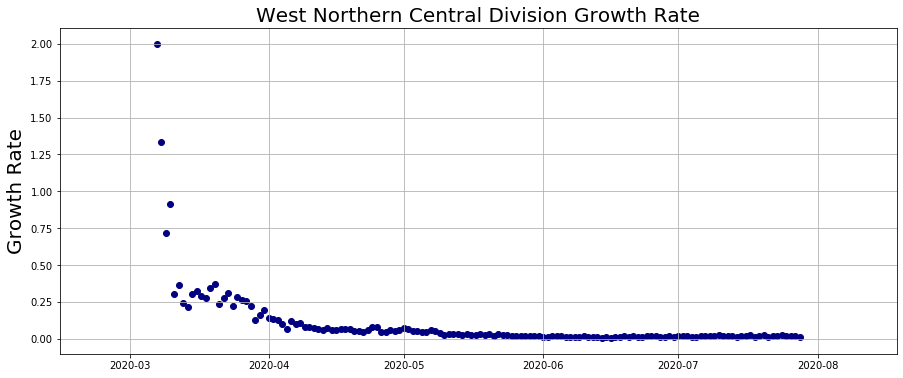

In [35]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(wnc_group['datetime'],wnc_group['growth_rate'],c='#000080',)
plt.grid(True)
plt.title("West Northern Central Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

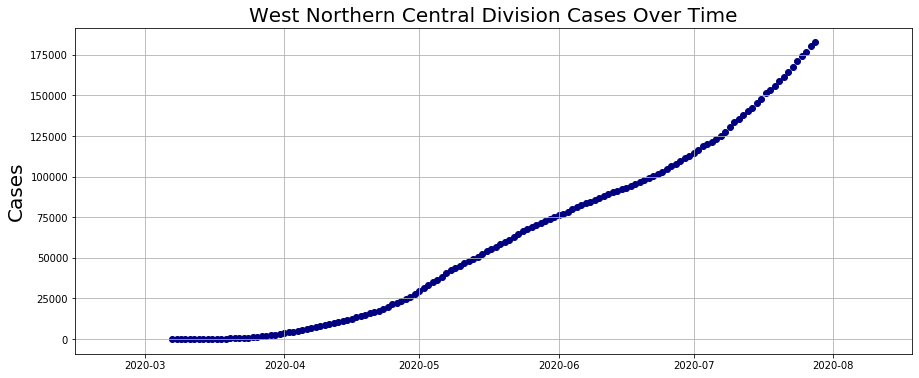

In [36]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(wnc_group['datetime'],wnc_group['cases'],c='#000080',)
plt.grid(True)
plt.title('West Northern Central Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

# Create Machine Learning Model
We will use a Linear Rgression Model to predict Covid-19 cases through the end of 2020.

In [15]:
# Make the model
wnc_model = LinearRegression()

In [16]:
# Assign the features and the target
X_wnc = wnc_group[["day", "month", "year"]]
y_wnc = wnc_group[["cases"]]

In [17]:
# Split the data for training and testing
X_train_wnc, X_test_wnc, y_train_wnc, y_test_wnc = train_test_split(X_wnc, y_wnc, random_state=42) 

In [18]:
# Fit the model with the training data and score it with the testing data
wnc_model.fit(X_train_wnc, y_train_wnc)
wnc_model.score(X_test_wnc, y_test_wnc)

0.9637699814619062

In [19]:
# Make Dataframe for the holidays which will be used for the predicitons:
# Labor Day, Election Day, Thanksgiving, Christmas

holidays = {"day": [7, 3, 26, 25], "month": [9, 11, 11, 12], "year": [2020, 2020, 2020, 2020]}
predict_holidays = pd.DataFrame(holidays)
predict_holidays["datetime"] = pd.to_datetime((predict_holidays.year*10000+predict_holidays.month*100+predict_holidays.day).apply(str),format='%Y%m%d')
predict_holidays

,day,month,year,datetime
0,7,9,2020,2020-09-07
1,3,11,2020,2020-11-03
2,26,11,2020,2020-11-26
3,25,12,2020,2020-12-25


In [20]:
# Predict with the model
predictions = wnc_model.predict(predict_holidays[["day", "month", "year"]])
predictions

# convert predictions from ndarray to list
preds_arr = []
for i in predictions:
    preds_arr.append(np.asscalar(i))


In [22]:
# Add the precitions back to the DataFrame and convert from object to 
# float so we can use it for graphing
predict_holidays["predicted_cases"] = predictions
predict_holidays["predicted_cases"] = predict_holidays['predicted_cases'].astype('float')
predict_holidays.head()

,day,month,year,datetime,predicted_cases
0,7,9,2020,2020-09-07,205261.153470
1,3,11,2020,2020-11-03,278260.403275
2,26,11,2020,2020-11-26,309506.368117
3,25,12,2020,2020-12-25,347364.513231


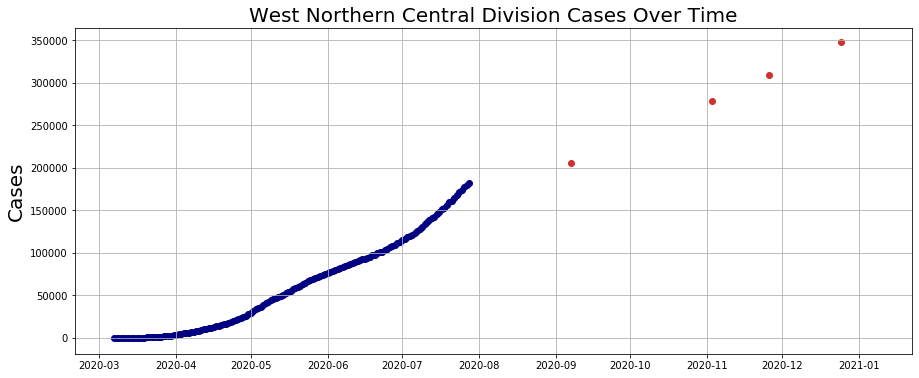

In [33]:
# Graph with Actual Values and Predicitons

plt.figure(figsize = (15, 6))
plt.scatter(predict_holidays['datetime'],predict_holidays['predicted_cases'],c='#d0312d',)
plt.scatter(wnc_group['datetime'],wnc_group['cases'],c='#000080',)
plt.grid(True)
plt.title('West Northern Central Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

# Make Predictions for States within the West North Central Division

## Iowa

In [37]:
# Create DF just for Iowa

Iowa= usa[usa['state_name']=='Iowa']

# now create new column for growth rate
Iowa['growth_rate'] = Iowa['cases'].pct_change()
Iowa.head(5)

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
5541,Iowa,3/8/2020,3,0,0.0,15.0,2.0,15.0,NaN,NaN,NaN,NaN,2020-03-08,NaN
5542,Iowa,3/9/2020,8,0,3.0,26.0,8.0,29.0,NaN,NaN,NaN,NaN,2020-03-09,1.666667
5543,Iowa,3/10/2020,13,0,8.0,32.0,11.0,40.0,NaN,NaN,NaN,NaN,2020-03-10,0.625000
5544,Iowa,3/11/2020,14,0,13.0,46.0,27.0,59.0,NaN,NaN,NaN,NaN,2020-03-11,0.076923
5545,Iowa,3/12/2020,16,0,14.0,67.0,24.0,81.0,NaN,NaN,NaN,NaN,2020-03-12,0.142857


In [38]:
# Convert to datetime and separate out the columns

Iowa['datetime'] = pd.to_datetime(Iowa['datetime'])
Iowa['day'] = Iowa['datetime'].map(lambda x: x.day)
Iowa['month'] = Iowa['datetime'].map(lambda x: x.month)
Iowa['year'] = Iowa['datetime'].map(lambda x: x.year)

## Linear Regression for Iowa

In [39]:
# Create the model
iowa_model = LinearRegression()

In [64]:
# Assign features and the target
X_iowa = Iowa[['day', 'month', 'year']]
y_iowa = Iowa["cases"]

In [41]:
# Split the data for training and testing
X_train_iowa, X_test_iowa, y_train_iowa, y_test_iowa = train_test_split(X_iowa, y_iowa, random_state=42)

In [42]:
# Fit and score the model
iowa_model.fit(X_train_iowa, y_train_iowa)
iowa_model.score(X_test_iowa, y_test_iowa)

0.9718965405653371

In [43]:
# Create predictions
iowa_preds = iowa_model.predict(predict_holidays[["day", "month", "year"]])
iowa_preds

array([52269.32774047, 70915.60672574, 78530.30370489, 88184.51697923])

In [44]:
# set up dataframe to put Iowa predicitons in
iowa_predictions = predict_holidays[["day", "month", "year", "datetime"]]
iowa_predictions

,day,month,year,datetime
0,7,9,2020,2020-09-07
1,3,11,2020,2020-11-03
2,26,11,2020,2020-11-26
3,25,12,2020,2020-12-25


In [65]:
# convert predictions from ndarray to list

preds_arr = []
for i in iowa_preds:
    preds_arr.append(np.asscalar(i))


## Predictions for Iowa

In [47]:
# Add the precitions back to the DataFrame and convert from object to 
# float so we can use it for graphing

iowa_predictions["predicted_cases"] = iowa_preds
iowa_predictions["predicted_cases"] = iowa_predictions['predicted_cases'].astype('float')
iowa_predictions.head()

,day,month,year,datetime,predicted_cases
0,7,9,2020,2020-09-07,52269.327740
1,3,11,2020,2020-11-03,70915.606726
2,26,11,2020,2020-11-26,78530.303705
3,25,12,2020,2020-12-25,88184.516979


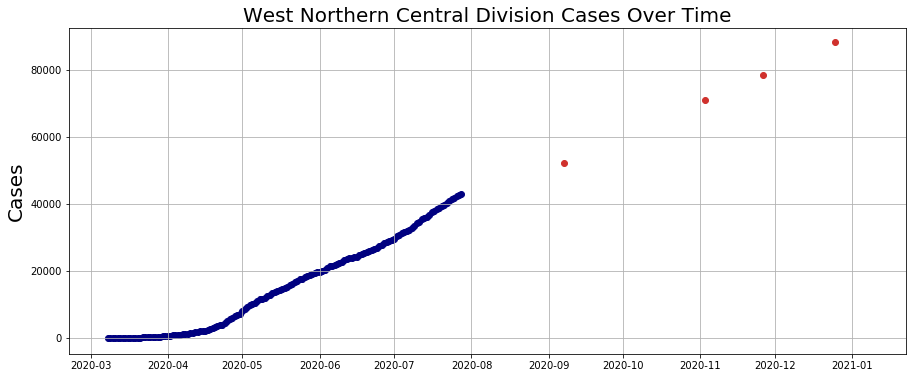

In [48]:
# Graph with Actual Values and Predicitons

plt.figure(figsize = (15, 6))
plt.scatter(iowa_predictions['datetime'], iowa_predictions['predicted_cases'],c='#d0312d',)
plt.scatter(Iowa['datetime'],Iowa['cases'],c='#000080',)
plt.grid(True)
plt.title('Iowa Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

## Minnesota

In [49]:
# Create DF for just Minneosta
minnesota = usa[usa['state_name']=='Minnesota']
minnesota

# now create new column for growth rate
minnesota['growth_rate'] = minnesota['cases'].pct_change()
minnesota.head(5)

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
6720,Minnesota,3/6/2020,1,0,1.0,36.0,NaN,37.0,NaN,NaN,NaN,NaN,2020-03-06,NaN
6721,Minnesota,3/7/2020,1,0,2.0,48.0,NaN,50.0,NaN,NaN,NaN,NaN,2020-03-07,0.0
6722,Minnesota,3/8/2020,2,0,2.0,48.0,NaN,50.0,NaN,NaN,NaN,NaN,2020-03-08,1.0
6723,Minnesota,3/9/2020,2,0,5.0,80.0,NaN,85.0,NaN,NaN,NaN,NaN,2020-03-09,0.0
6724,Minnesota,3/10/2020,3,0,11.0,132.0,NaN,143.0,NaN,NaN,NaN,NaN,2020-03-10,0.5


In [50]:
# Convert to datetime and separate out the columns

minnesota['datetime'] = pd.to_datetime(minnesota['datetime'])
minnesota['day'] = minnesota['datetime'].map(lambda x: x.day)
minnesota['month'] = minnesota['datetime'].map(lambda x: x.month)
minnesota['year'] = minnesota['datetime'].map(lambda x: x.year)

## Linear Regression for Minnesota

In [51]:
# Create the model

mn_model = LinearRegression()

In [52]:
# Assign the features and the target

X_mn = minnesota[['day', 'month', 'year']]
y_mn = minnesota["cases"]

In [53]:
# Split the data for training and testing

X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(X_mn, y_mn, random_state=42)

In [54]:
# Fit and score the model

mn_model.fit(X_train_mn, y_train_mn)
mn_model.score(X_test_mn, y_test_mn)

0.95709986384744

In [55]:
# Find predictions

mn_preds = mn_model.predict(predict_holidays[["day", "month", "year"]])
mn_preds

array([ 62874.97572212,  85478.13229762,  95179.99411537, 106903.39248215])

In [57]:
# set up dataframe to put Minnesota predicitons in
mn_predictions = predict_holidays[["day", "month", "year", "datetime"]]
mn_predictions

,day,month,year,datetime
0,7,9,2020,2020-09-07
1,3,11,2020,2020-11-03
2,26,11,2020,2020-11-26
3,25,12,2020,2020-12-25


In [58]:
# convert predictions from ndarray to list

preds_arr = []
for i in mn_preds:
    preds_arr.append(np.asscalar(i))

## Predictions for Minnesota

In [59]:
# Add the precitions back to the DataFrame and convert from object to 
# float so we can use it for graphing

mn_predictions["predicted_cases"] = mn_preds
mn_predictions["predicted_cases"] = mn_predictions['predicted_cases'].astype('float')
mn_predictions.head()

,day,month,year,datetime,predicted_cases
0,7,9,2020,2020-09-07,62874.975722
1,3,11,2020,2020-11-03,85478.132298
2,26,11,2020,2020-11-26,95179.994115
3,25,12,2020,2020-12-25,106903.392482


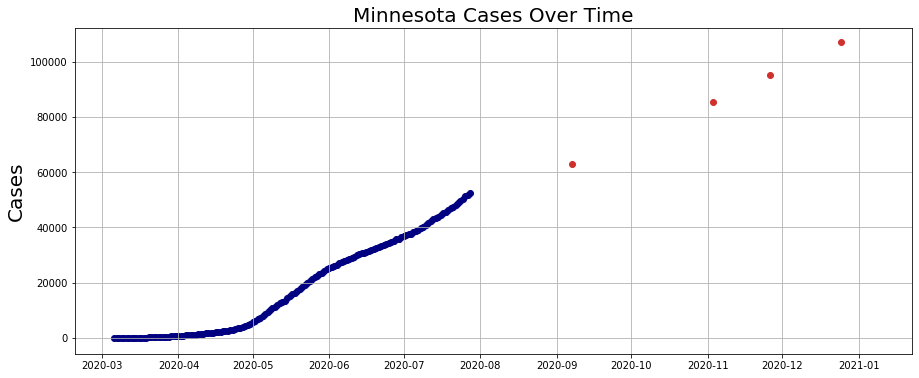

In [61]:
plt.figure(figsize = (15, 6))
plt.scatter(mn_predictions['datetime'], mn_predictions['predicted_cases'],c='#d0312d',)
plt.scatter(minnesota['datetime'],minnesota['cases'],c='#000080',)
plt.grid(True)
plt.title('Minnesota Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

## Kannas

In [62]:
# Create DF for just Kannas
Kansas = usa[usa['state_name']=='Kansas']
# now create new column for growth rate
Kansas['growth_rate'] = Kansas['cases'].pct_change()
Kansas.head(5)

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
5684,Kansas,3/7/2020,1,0,0.0,11.0,2.0,11.0,NaN,NaN,NaN,NaN,2020-03-07,NaN
5685,Kansas,3/8/2020,1,0,1.0,11.0,0.0,12.0,NaN,NaN,NaN,NaN,2020-03-08,0.0
5686,Kansas,3/9/2020,1,0,1.0,11.0,0.0,12.0,NaN,NaN,NaN,NaN,2020-03-09,0.0
5687,Kansas,3/10/2020,1,0,1.0,17.0,21.0,18.0,NaN,NaN,NaN,NaN,2020-03-10,0.0
5688,Kansas,3/11/2020,1,0,1.0,41.0,NaN,42.0,NaN,NaN,NaN,NaN,2020-03-11,0.0


In [63]:
# Convert to Datetime and separate out into individual columns
Kansas['datetime'] = pd.to_datetime(Kansas['datetime'])
Kansas['day'] = Kansas['datetime'].map(lambda x: x.day)
Kansas['month'] = Kansas['datetime'].map(lambda x: x.month)
Kansas['year'] = Kansas['datetime'].map(lambda x: x.year)

## Linear Regression for Kansas

In [78]:
# Create the model

ks_model = LinearRegression()

In [79]:
# Assign features and the target

X_ks = Kansas[['day', 'month', 'year']]
y_ks = Kansas["cases"]

In [80]:
# Split the data for training and testing

X_train_ks, X_test_ks, y_train_ks, y_test_ks = train_test_split(X_ks, y_ks, random_state=42)

In [81]:
# Fit and score the model

ks_model.fit(X_train_ks, y_train_ks)
ks_model.score(X_test_ks, y_test_ks)

0.9437026962424669

In [82]:
# Create predictions

ks_preds = ks_model.predict(predict_holidays[["day", "month", "year"]])
ks_preds

array([28484.42876085, 38638.48233681, 43104.81340303, 48376.02849824])

In [83]:
# set up dataframe to put Kansas predicitons in

ks_predictions = predict_holidays[["day", "month", "year", "datetime"]]
ks_predictions

,day,month,year,datetime
0,7,9,2020,2020-09-07
1,3,11,2020,2020-11-03
2,26,11,2020,2020-11-26
3,25,12,2020,2020-12-25


In [84]:
# convert predictions from ndarray to list

preds_arr = []
for i in ks_preds:
    preds_arr.append(np.asscalar(i))

## Make Predictions for Kansas

In [85]:
# Add the precitions back to the DataFrame and convert from object to 
# float so we can use it for graphing

ks_predictions["predicted_cases"] = ks_preds
ks_predictions["predicted_cases"] = ks_predictions['predicted_cases'].astype('float')
ks_predictions.head()

,day,month,year,datetime,predicted_cases
0,7,9,2020,2020-09-07,28484.428761
1,3,11,2020,2020-11-03,38638.482337
2,26,11,2020,2020-11-26,43104.813403
3,25,12,2020,2020-12-25,48376.028498


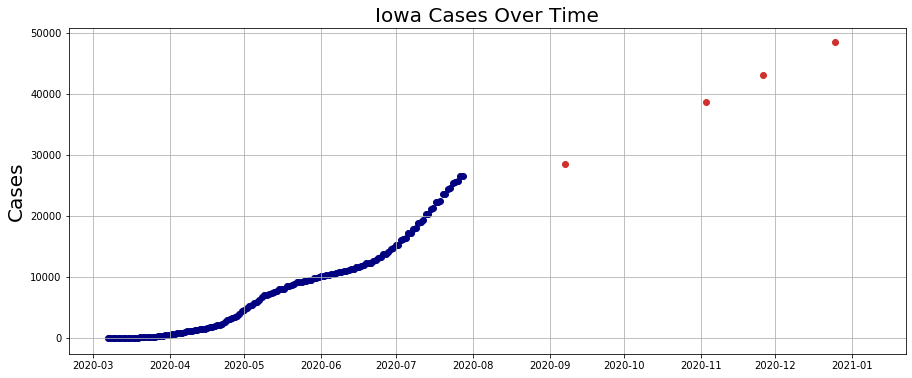

In [86]:
# Graph with Actual Values and Predicitons

plt.figure(figsize = (15, 6))
plt.scatter(ks_predictions['datetime'], ks_predictions['predicted_cases'],c='#d0312d',)
plt.scatter(Kansas['datetime'],Kansas['cases'],c='#000080',)
plt.grid(True)
plt.title('Kansas Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

## Missouri

In [87]:
# Create DF for just Missouri
Missouri = usa[usa['state_name']=='Missouri']
# now create new column for growth rate
Missouri['growth_rate'] = Missouri['cases'].pct_change()
Missouri.head(5)

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
7005,Missouri,3/7/2020,1,0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-03-07,NaN
7006,Missouri,3/8/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-08,0.0
7007,Missouri,3/9/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-09,0.0
7008,Missouri,3/10/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-10,0.0
7009,Missouri,3/11/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-11,0.0


In [88]:
# Convert to datetime and separate out the columns

Missouri['datetime'] = pd.to_datetime(Missouri['datetime'])
Missouri['day'] = Missouri['datetime'].map(lambda x: x.day)
Missouri['month'] = Missouri['datetime'].map(lambda x: x.month)
Missouri['year'] = Missouri['datetime'].map(lambda x: x.year)

## Linear Regression for Missouri

In [89]:
# Create the model

mo_model = LinearRegression()

In [91]:
# Assign features and the target

X_mo = Missouri[['day', 'month', 'year']]
y_mo = Missouri["cases"]

In [92]:
# Split the data for training and testing

X_train_mo, X_test_mo, y_train_mo, y_test_mo = train_test_split(X_mo, y_mo, random_state=42)

In [93]:
# Fit and score the model

mo_model.fit(X_train_mo, y_train_mo)
mo_model.score(X_test_mo, y_test_mo)

0.9265715294315912

In [94]:
# Create predictions

mo_preds = mo_model.predict(predict_holidays[["day", "month", "year"]])
mo_preds

array([42760.64737763, 57801.91281057, 65452.9644908 , 73306.25162815])

## Predictions for Missouri

In [95]:
# set up dataframe to put Missouri predicitons in

mo_predictions = predict_holidays[["day", "month", "year", "datetime"]]
mo_predictions

,day,month,year,datetime
0,7,9,2020,2020-09-07
1,3,11,2020,2020-11-03
2,26,11,2020,2020-11-26
3,25,12,2020,2020-12-25


In [96]:
# convert predictions from ndarray to list

preds_arr = []
for i in mo_preds:
    preds_arr.append(np.asscalar(i))


In [98]:
# Add the precitions back to the DataFrame and convert from object to 
# float so we can use it for graphing

mo_predictions["predicted_cases"] = mo_preds
mo_predictions["predicted_cases"] = mo_predictions['predicted_cases'].astype('float')
mo_predictions.head()

,day,month,year,datetime,predicted_cases
0,7,9,2020,2020-09-07,42760.647378
1,3,11,2020,2020-11-03,57801.912811
2,26,11,2020,2020-11-26,65452.964491
3,25,12,2020,2020-12-25,73306.251628


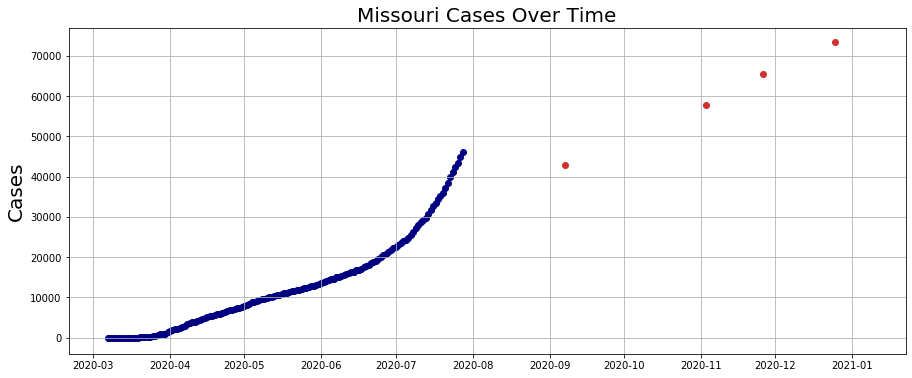

In [99]:
# Graph with Actual Values and Predicitons

plt.figure(figsize = (15, 6))
plt.scatter(mo_predictions['datetime'], mo_predictions['predicted_cases'],c='#d0312d',)
plt.scatter(Missouri['datetime'],Missouri['cases'],c='#000080',)
plt.grid(True)
plt.title('Missouri Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

## North Dakota

In [100]:
# Create DF for just North Dakota
North_Dakota = usa[usa['state_name']=='North Dakota']
# now create new column for growth rate
North_Dakota['growth_rate'] = North_Dakota['cases'].pct_change()
North_Dakota.head(5)

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
176,North Dakota,3/11/2020,1,0,0.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,2020-03-11,NaN
177,North Dakota,3/12/2020,1,0,1.0,12.0,14.0,13.0,NaN,NaN,NaN,NaN,2020-03-12,0.0
178,North Dakota,3/13/2020,1,0,1.0,39.0,12.0,40.0,NaN,NaN,NaN,NaN,2020-03-13,0.0
179,North Dakota,3/14/2020,1,0,1.0,54.0,14.0,55.0,NaN,NaN,NaN,NaN,2020-03-14,0.0
180,North Dakota,3/15/2020,1,0,1.0,95.0,4.0,96.0,NaN,NaN,NaN,NaN,2020-03-15,0.0


In [101]:
# Convert to datetime and separate out the columns

North_Dakota['datetime'] = pd.to_datetime(North_Dakota['datetime'])
North_Dakota['day'] = North_Dakota['datetime'].map(lambda x: x.day)
North_Dakota['month'] = North_Dakota['datetime'].map(lambda x: x.month)
North_Dakota['year'] = North_Dakota['datetime'].map(lambda x: x.year)

## Linear Regressions for North Dakota

In [103]:
# Create the model

nd_model = LinearRegression()

In [104]:
# Assign the features and the target

X_nd = North_Dakota[['day', 'month', 'year']]
y_nd = North_Dakota["cases"]

In [105]:
# Split the data for training and testing

X_train_nd, X_test_nd, y_train_nd, y_test_nd = train_test_split(X_nd, y_nd, random_state=42)

In [106]:
# Fit and score the model

nd_model.fit(X_train_nd, y_train_nd)
nd_model.score(X_test_nd, y_test_nd)

0.9724649538442882

In [107]:
# Find predictions

nd_preds = nd_model.predict(predict_holidays[["day", "month", "year"]])
nd_preds

array([ 6649.38007287,  9001.66514369, 10175.97624238, 11403.17578208])

## Predictions for North Dakota

In [108]:
# set up dataframe to put North Dakota predicitons in

nd_predictions = predict_holidays[["day", "month", "year", "datetime"]]
nd_predictions

,day,month,year,datetime
0,7,9,2020,2020-09-07
1,3,11,2020,2020-11-03
2,26,11,2020,2020-11-26
3,25,12,2020,2020-12-25


In [110]:
# convert predictions from ndarray to list

preds_arr = []
for i in nd_preds:
    preds_arr.append(np.asscalar(i))

In [111]:
# Add the precitions back to the DataFrame and convert from object to 
# float so we can use it for graphing

nd_predictions["predicted_cases"] = nd_preds
nd_predictions["predicted_cases"] = nd_predictions['predicted_cases'].astype('float')
nd_predictions.head()

,day,month,year,datetime,predicted_cases
0,7,9,2020,2020-09-07,6649.380073
1,3,11,2020,2020-11-03,9001.665144
2,26,11,2020,2020-11-26,10175.976242
3,25,12,2020,2020-12-25,11403.175782


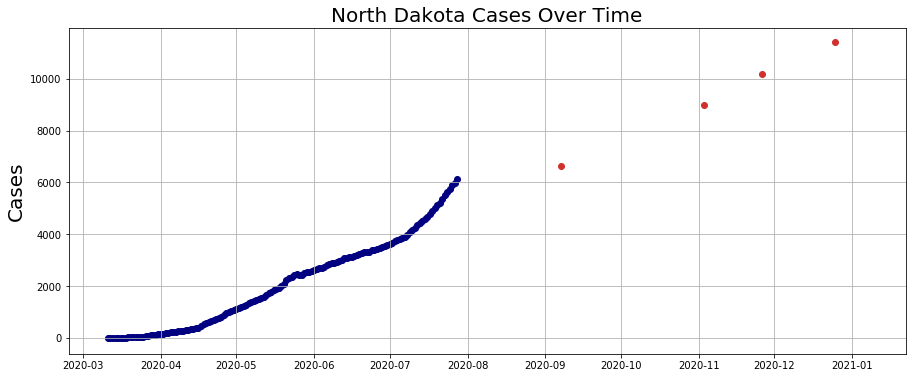

In [112]:
plt.figure(figsize = (15, 6))
plt.scatter(nd_predictions['datetime'], nd_predictions['predicted_cases'],c='#d0312d',)
plt.scatter(North_Dakota['datetime'],North_Dakota['cases'],c='#000080',)
plt.grid(True)
plt.title('North Dakota Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

## South Dakota

In [113]:
# Create DF for just Kannas
South_Dakota = usa[usa['state_name']=='South Dakota']
# now create new column for growth rate
South_Dakota['growth_rate'] = South_Dakota['cases'].pct_change()
South_Dakota.head(5)

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime,growth_rate
1195,South Dakota,3/10/2020,5,1,0.0,11.0,0.0,11.0,NaN,NaN,NaN,NaN,2020-03-10,NaN
1196,South Dakota,3/11/2020,8,1,5.0,13.0,2.0,18.0,NaN,NaN,NaN,NaN,2020-03-11,0.600
1197,South Dakota,3/12/2020,8,1,8.0,27.0,11.0,35.0,NaN,NaN,NaN,NaN,2020-03-12,0.000
1198,South Dakota,3/13/2020,9,1,9.0,73.0,11.0,82.0,NaN,NaN,NaN,NaN,2020-03-13,0.125
1199,South Dakota,3/14/2020,9,1,9.0,182.0,3.0,191.0,NaN,NaN,NaN,NaN,2020-03-14,0.000


In [114]:
# Convert to datetime and separate out the columns

South_Dakota['datetime'] = pd.to_datetime(South_Dakota['datetime'])
South_Dakota['day'] = South_Dakota['datetime'].map(lambda x: x.day)
South_Dakota['month'] = South_Dakota['datetime'].map(lambda x: x.month)
South_Dakota['year'] = South_Dakota['datetime'].map(lambda x: x.year)

## Linear Regression for South Dakota

In [115]:
# Create the model

sd_model = LinearRegression()

In [116]:
# Assign the features and the target

X_sd = South_Dakota[['day', 'month', 'year']]
y_sd = South_Dakota["cases"]

In [117]:
# Split the data for training and testing

X_train_sd, X_test_sd, y_train_sd, y_test_sd = train_test_split(X_sd, y_sd, random_state=42)

In [118]:
# Fit and score the model

sd_model.fit(X_train_sd, y_train_sd)
sd_model.score(X_test_sd, y_test_sd)

0.990921880201253

In [119]:
# Find predictions

sd_preds = sd_model.predict(predict_holidays[["day", "month", "year"]])
sd_preds

array([11409.60858293, 15297.35540816, 16949.04544165, 18964.73146442])

## Predictions for South Dakota

In [120]:
# set up dataframe to put South Dakota predicitons in

sd_predictions = predict_holidays[["day", "month", "year", "datetime"]]
sd_predictions

,day,month,year,datetime
0,7,9,2020,2020-09-07
1,3,11,2020,2020-11-03
2,26,11,2020,2020-11-26
3,25,12,2020,2020-12-25


In [121]:
# convert predictions from ndarray to list

preds_arr = []
for i in mn_preds:
    preds_arr.append(np.asscalar(i))

In [122]:
# Add the precitions back to the DataFrame and convert from object to 
# float so we can use it for graphing

sd_predictions["predicted_cases"] = sd_preds
sd_predictions["predicted_cases"] = sd_predictions['predicted_cases'].astype('float')
sd_predictions.head()

,day,month,year,datetime,predicted_cases
0,7,9,2020,2020-09-07,11409.608583
1,3,11,2020,2020-11-03,15297.355408
2,26,11,2020,2020-11-26,16949.045442
3,25,12,2020,2020-12-25,18964.731464


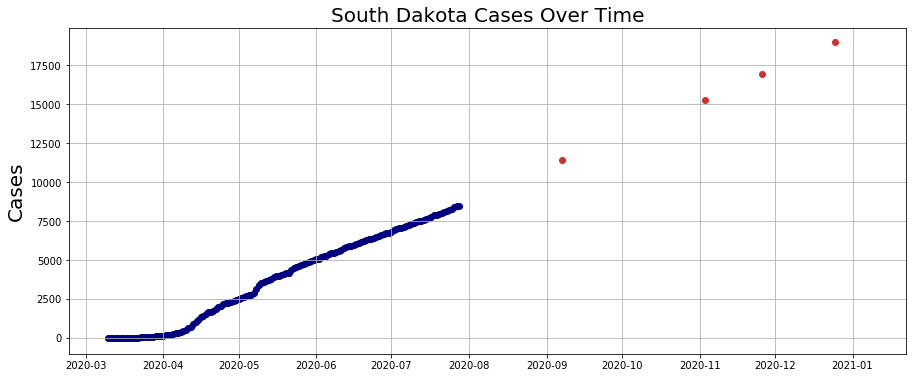

In [123]:
plt.figure(figsize = (15, 6))
plt.scatter(sd_predictions['datetime'], sd_predictions['predicted_cases'],c='#d0312d',)
plt.scatter(South_Dakota['datetime'],South_Dakota['cases'],c='#000080',)
plt.grid(True)
plt.title('South Dakota Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()